<a href="https://colab.research.google.com/github/nlbtoan/AI-practis/blob/master/TIC_AI_training_MNIST_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tổng quan mạng CNN

![CNN](http://personal.ie.cuhk.edu.hk/~ccloy/project_target_code/images/fig3.png)

## Tổng quan bộ dataset MNIST

Ví dụ này sử dụng bộ data hình ảnh về chữ số viết tay tên MNIST. Bộ dữ liệu này chưa 60.000 ảnh cho training và 10,000 ảnh cho testing. Hình ảnh chữ số được chuẩn hóa và căn giữa vào một hình có độ phân giải cố định (28x28) với giá từng giá trị đi từ 0 tới 255.


![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

Thông tin thêm: http://yann.lecun.com/exdb/mnist/


In [ ]:
import numpy  as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets   import mnist
from keras.models     import Sequential
from keras.layers     import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers     import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.utils      import np_utils
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image         import ImageDataGenerator
from keras.layers.normalization        import BatchNormalization

np.random.seed(25)

tf.__version__

Using TensorFlow backend.


'2.2.0'

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape",  X_test.shape)
print("y_test original shape",  y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5, 1.0, 'Class 5')

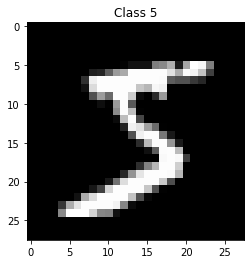

In [ ]:
plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test  = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')

X_train /=255
X_test  /=255

X_train.shape

(60000, 28, 28, 1)

In [ ]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test  = np_utils.to_categorical(y_test,  number_of_classes)

y_train[0], Y_train[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [ ]:
# 3 Bước trong mạng CNN
# 1. Convolution
# 2. Activation
# 3. Pooling
# Lặp lại bước 1,2,3 để thêm các lớp hidden

# 4. Thêm các lớp mạng ANN (Dense)
# Cho phép mô hình có khả năng phân loại

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
# BatchNormalization(axis=0)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
# BatchNormalization(axis=0)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

# BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
# BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 10, 10, 64)       

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
test_gen  = ImageDataGenerator()
train_gen = ImageDataGenerator(rotation_range=8, 
                               width_shift_range=0.08, 
                               height_shift_range=0.08,
                               shear_range=0.3, 
                               zoom_range=0.08,
                               )

In [ ]:
train_generator = train_gen.flow(X_train, Y_train, batch_size=64)
test_generator  = test_gen.flow(X_test,   Y_test,  batch_size=64)

In [ ]:
hist = model.fit_generator(train_generator, 
                           steps_per_epoch=60000//64, 
                           epochs=5, 
                           validation_data=test_generator, 
                           validation_steps=10000//64)

Epoch 1/5
937/937 [==============================] - 37s 39ms/step - loss: 0.2014 - accuracy: 0.9362 - val_loss: 0.0322 - val_accuracy: 0.9894
Epoch 2/5
937/937 [==============================] - 32s 34ms/step - loss: 0.0628 - accuracy: 0.9805 - val_loss: 0.0516 - val_accuracy: 0.9907
Epoch 3/5
937/937 [==============================] - 33s 35ms/step - loss: 0.0466 - accuracy: 0.9857 - val_loss: 0.1105 - val_accuracy: 0.9918
Epoch 4/5
937/937 [==============================] - 32s 35ms/step - loss: 0.0413 - accuracy: 0.9875 - val_loss: 0.0617 - val_accuracy: 0.9869
Epoch 5/5
937/937 [==============================] - 32s 34ms/step - loss: 0.0348 - accuracy: 0.9891 - val_loss: 0.0115 - val_accuracy: 0.9930


In [ ]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

10000/10000 [==============================] - 1s 143us/step

Test accuracy:  0.9927999973297119


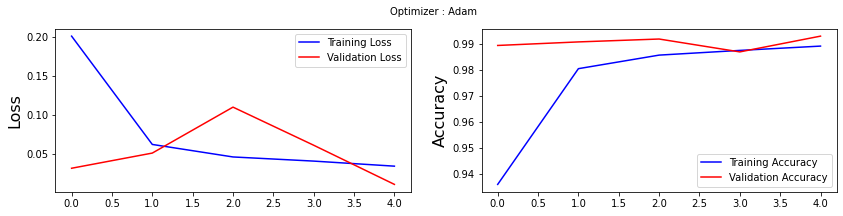

In [ ]:
def visualize_model_history(hist,figsize=(14,3)):
    plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    plt.suptitle('Optimizer : Adam', fontsize=10)
    plt.ylabel('Loss', fontsize=16)
    plt.plot(hist.history['loss'], color='b', label='Training Loss')
    if 'val_loss' in hist.history.keys():
        plt.plot(hist.history['val_loss'], color='r', label='Validation Loss')
    plt.legend(loc='upper right')

    plt.subplot(1, 2, 2)
    plt.ylabel('Accuracy', fontsize=16)
    plt.plot(hist.history['accuracy'], color='b', label='Training Accuracy')
    if 'val_accuracy' in hist.history.keys():
        plt.plot(hist.history['val_accuracy'], color='r', label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.show()

visualize_model_history(hist)